# Exploring Linear Regression with Gradient Descent and Regularization

In this task, your will explore linear regression with gradient descent and regularization.
Previously we performed linear regression but we actually were using the built-in "normal" equations which automagically were solving for coefficients.  In this lab we will use scikit-learns SGDRegressor, which stands for Stochastic Gradient Descent Regression -- using Gradient descent to perform linear regression! 

Our goals are two fold

1. Practice setting the learning rate on SGD
2. Practice setting the regularization term with linear regression.


In [1]:
#import the things we need
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error


## Create Synthetic Data.
We will use our handy functions again to create data.

* Experiment with the **`noise`** keyword argument to see how it affects the graph below, after you are done experimenting, set `noise=20`.
* Experiment with the **`random_state`** variable to get different sets of data

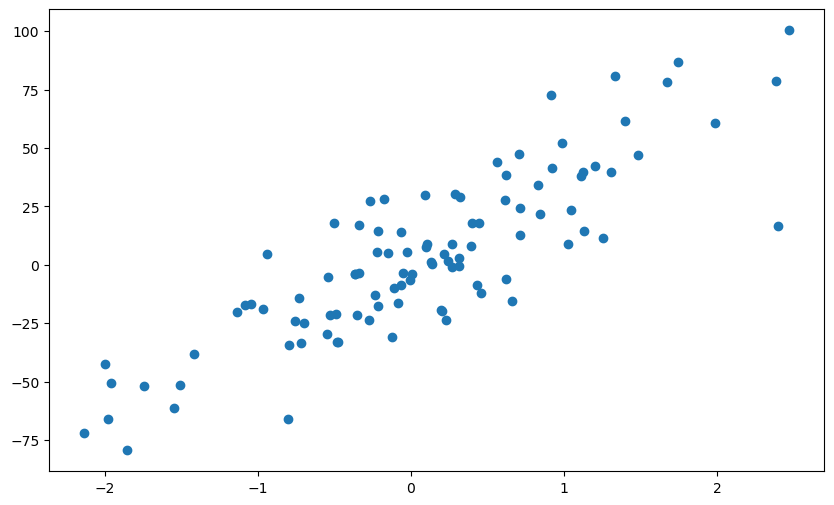

In [11]:
X, y = make_regression(n_samples=100, n_features=1, noise = 20.0, random_state = 10)
plt.figure(figsize=(10,6))
plt.scatter(X, y);

In [12]:
#create testing data to plot our prediction onto later - 
# this code is how we "plot a line !!" we need data to create the line
X_test = np.linspace(min(X),max(X),100)

# Linear Regression with Gradient Descent
Ok, now we'll let the computer "learn" for itself what the best line is, but this time using gradient descent.
We'll use the [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor) model from scikit-learn to do this.  `SGDRegressor` implements Stochastic Gradient Descent and we will set it up to use a least squares (mean squared error) loss function. 

Let's create a linear regression model and fit it to our dataset.

In [13]:
# We will use our plot_linear function from before, except this time we will pass a built model into it.
def plot_linear(model):
    model.fit(X,y)
    print ("M :  {}, C : {}".format(model.coef_, model.intercept_))
    y_test = model.predict(X_test.reshape(-1,1))

    plt.figure(figsize=(10,6))
    plt.scatter(X,y)
    plt.plot(X_test.flatten(), y_test)
    plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))

In [14]:
from sklearn.linear_model import SGDRegressor

Let's review the parameters to set:

* `loss`:  This is the "loss" or "cost" function from the lectures. I am explicitly setting it to "squared_error" which is the exact same as MSE from lecture. Note that SGD actually defaults to this (I could have left it blank), but I wanted to show it to you so we are setting it manually.
* `penalty`: 'l2' this is the kind of regularization penalty we want to apply.  L2 is a mathematical distance, it's the euclidean distance (the kind we are all used to).
* `alpha`: this is the regularization term penalty, it is our knob for regularization. We will try many different sizes here. 
* `max_iter`: this is how many times we want to run gradient descent.
* `learning_rate` : this is the learning rate _schedule_ which is something we have not learned yet, but basically it's common to change your learning rate over time.  There are some default optionsn we will leave it on "constant" though, since we want to try out the most basic version of gradient descent.
* `eta0` : this is the actual number that will be used as the learning rate.

In [15]:
# these are all the default parameters
sgd = SGDRegressor(loss='squared_error',
                   penalty= 'l2',
                   alpha = 0.0001,
                   max_iter = 1000,
                   learning_rate = "constant",
                   eta0 = 0.01)

M :  [32.14967807], C : [1.69440971]


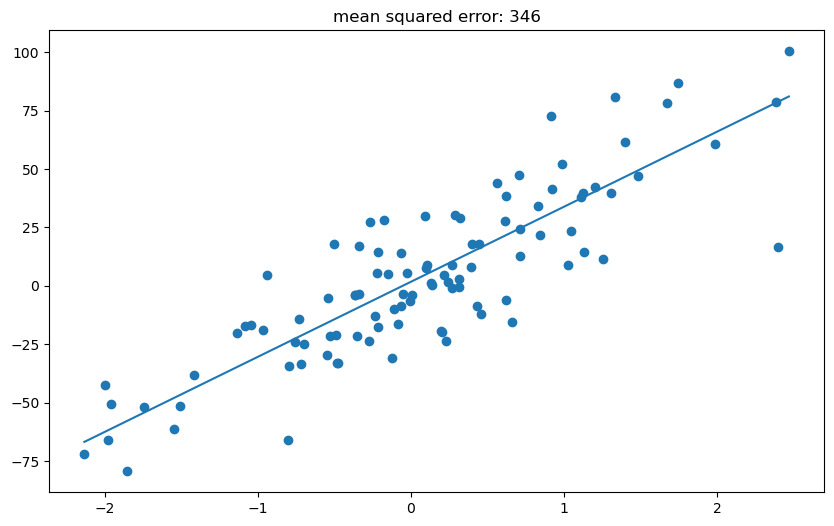

In [16]:
plot_linear(sgd)

So with all defaults our SGDRegressor performs very well.  Your job now is to try and _break_ our SGDRegressor.  What happens if you use a learning rate that is too small?  Too large?

M :  [30.27940458], C : [1.29823933]


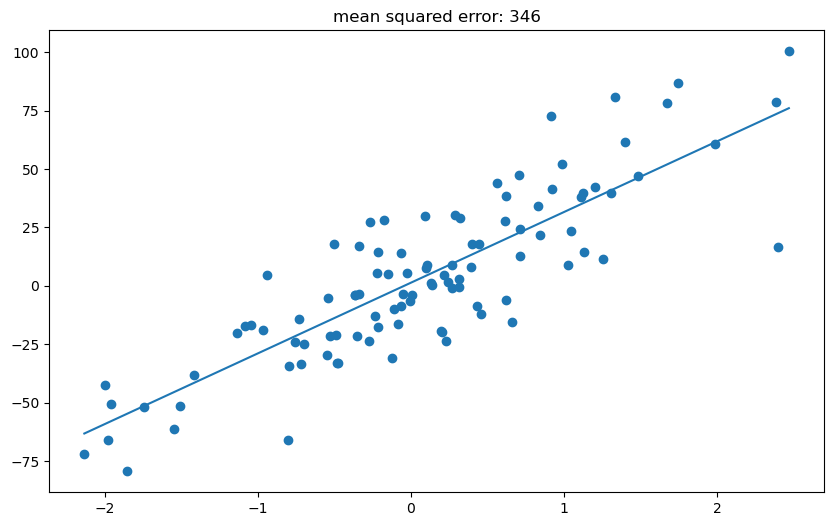

In [21]:
# set eta0 very small here
sgd = SGDRegressor(loss='squared_error',
                   penalty= 'l2',
                   alpha = 0.0001,
                   max_iter = 10000,
                   learning_rate = "constant",
                   eta0 = 0.00001)
plot_linear(sgd)

M :  [36.2443716], C : [0.45363401]


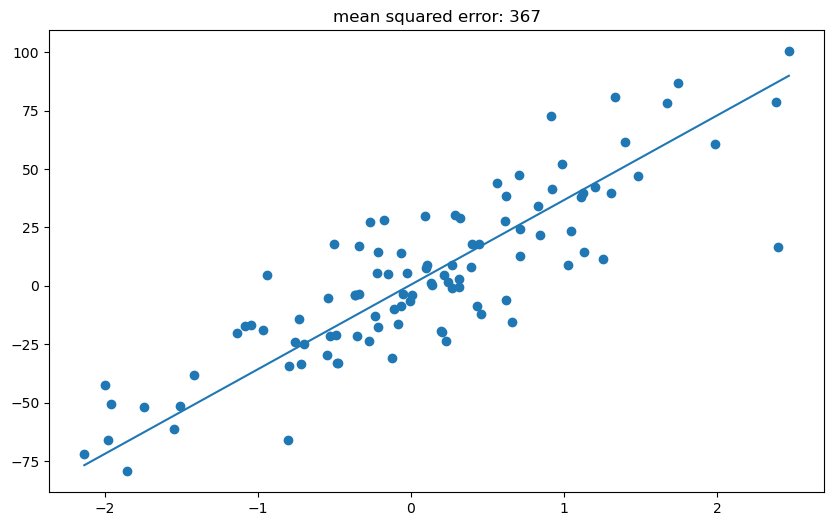

In [44]:
# set eta0 very large here
sgd = SGDRegressor(loss='squared_error',
                   penalty= 'l2',
                   alpha = 0.0001,
                   max_iter = 1000,
                   learning_rate = "constant",
                   eta0 = .3)
plot_linear(sgd)

Go ahead and play with the parameters a bit.  You can try different settings for max_iter and eta0.  In the next section we will look at how alpha, the regularization parameter affects a polynomial regressor.

# Polynomial Regression

Now let's give our regression model more degrees of freedom, this will let us learn how to set the regularization parameter.

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def plot_poly(sgd, degree = 3):
    # make a pipeline that creates the polynomial features based on our input data
    # this is akin to using performing polynomial regression
    # see http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
    
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                       ('linear', sgd)])
    model.fit(X,y)
    y_test = model.predict(X_test)
    plt.figure(figsize=(10,6))
    plt.scatter(X,y)
    plt.plot(X_test.flatten().reshape(-1,1), y_test, color = 'teal')
    plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))
    plt.ylim((min(y)-10,max(y)+10))


### Adjusting Alpha (regularization) parameter.

In this section we are going to use the Ridge regression model from scikilt-learn.  Ridge Regression will do the same regression, except with statistical methods that are different from gradient descent.  The reason we're using Ridge regression is that it behaves better when the dataset is smaller. The SGDRegressor would work (you can try it!) but it struggles to find a "good" fit when the dataset is so small (you will notice this if you try it out with any degree larger than 3).  Therefore since we want to get an intuition about regularization we'll practice regularization on the [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) model from scikit-learn.

In [28]:
from sklearn.linear_model import Ridge

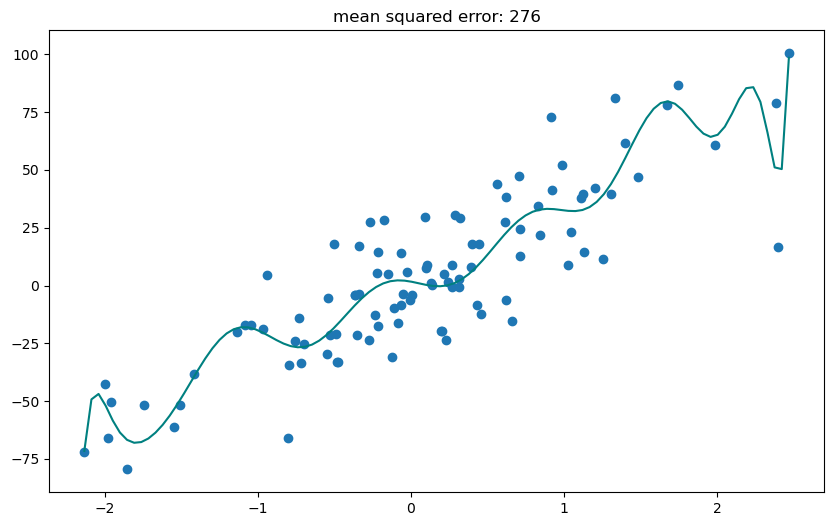

In [29]:
# no regularization!
ridge_ = Ridge(alpha = 0.0)
plot_poly(ridge_, degree = 15)

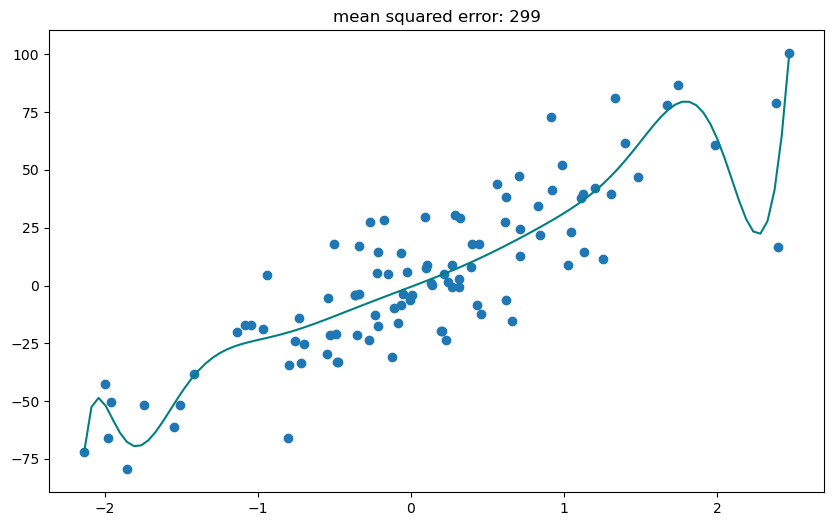

In [30]:
# 1.0 regularization!
ridge_ = Ridge(alpha = 1.0)
plot_poly(ridge_, degree = 15)

What happens with the interaction between degrees of freedom and a small alpha vs a large alpha?

If `alpha` is very small then the regularizatiom penalty is small, which would allow a lot of variance (lead to overfitting), if `alpha` is large, then the penalty will be large and the model will have a lot of bias (underfitting).

Try out different ranges of `alpha`, I would try all kinds of values from `0.001, 10000.0`
How does `alpha` interact with the degree? Set large degrees and small degrees.

Go ahead and try out different values and see what relationship you learn.

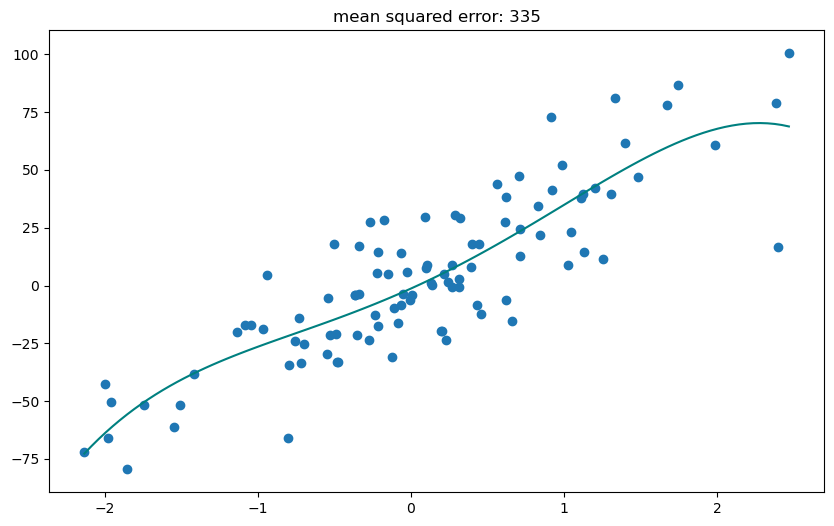

In [31]:
# you try!
ridge_ = Ridge(alpha = 0.001 )
plot_poly(ridge_, degree = 4)

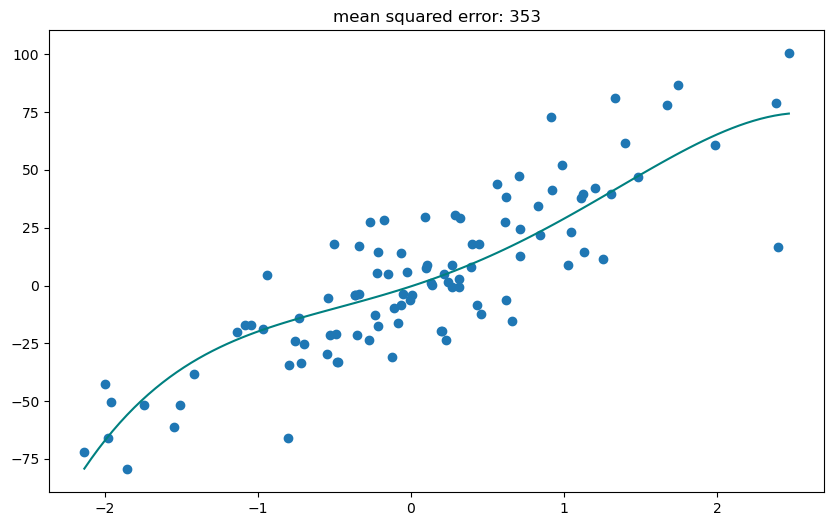

In [33]:
# you try!
ridge_ = Ridge(alpha = 10)
plot_poly(ridge_, degree = 4)

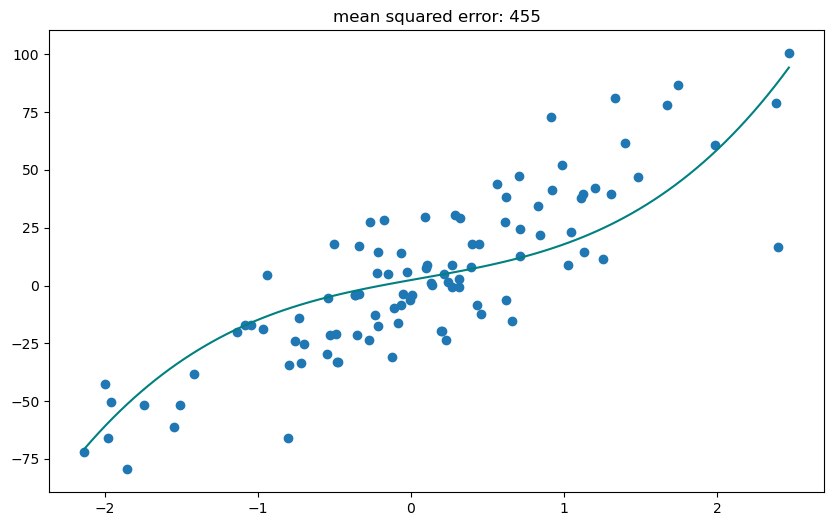

In [37]:
# you try!
ridge_ = Ridge(alpha = 50)
plot_poly(ridge_, degree = 3 )

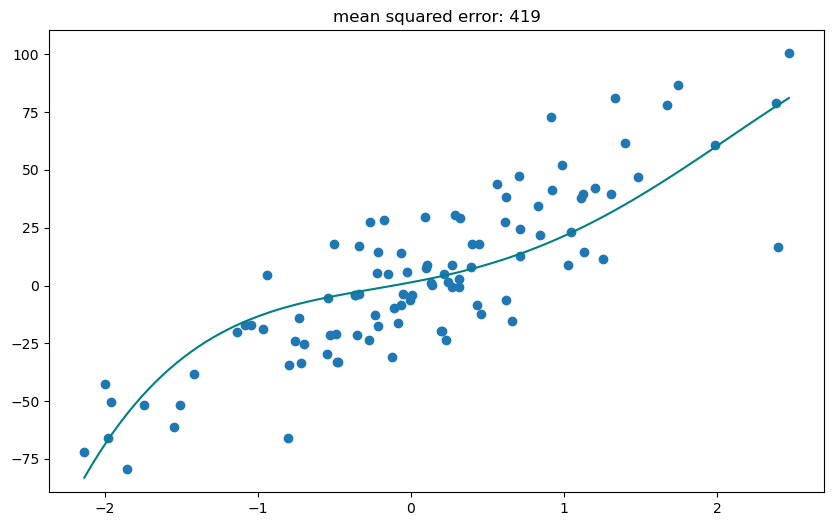

In [38]:
# you try!
ridge_ = Ridge(alpha = 40 )
plot_poly(ridge_, degree = 4)

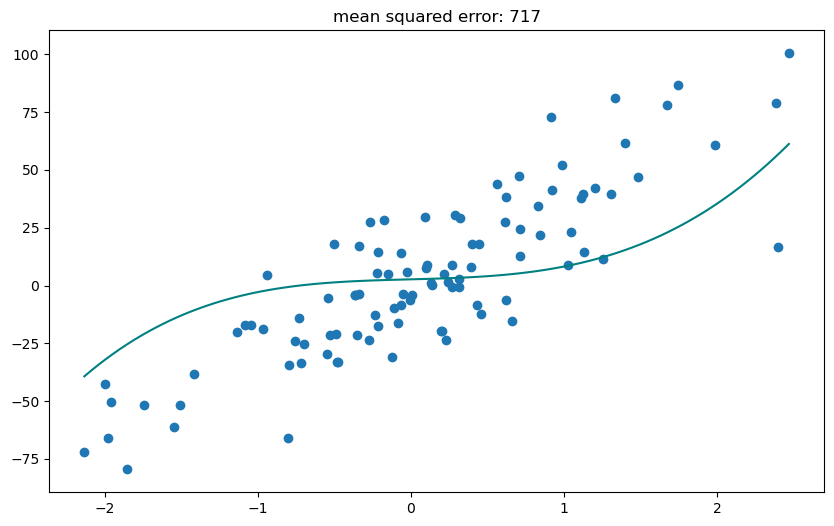

In [40]:
# you try!
ridge_ = Ridge(alpha = 1000)
plot_poly(ridge_, degree = 4)

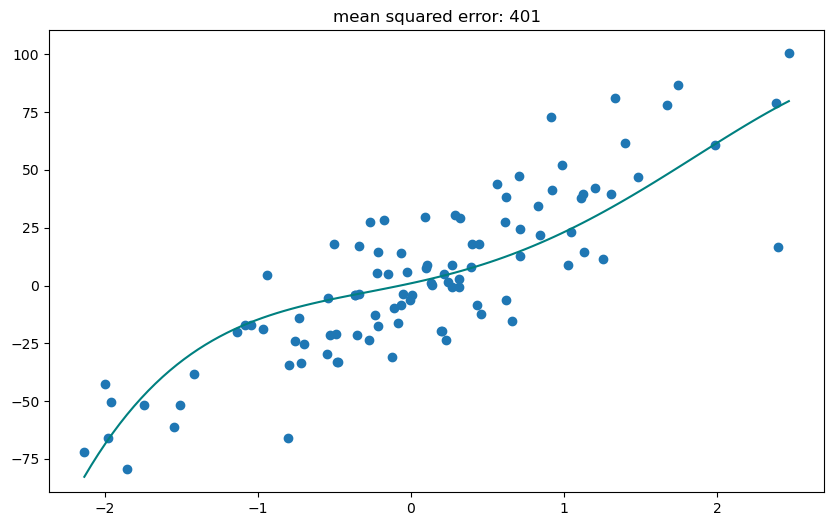

In [41]:
# you try!
ridge_ = Ridge(alpha = 30)
plot_poly(ridge_, degree = 4)